# Classifying Fashion-MNIST

Now it's your turn to build a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [49]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import helper
import time
import torch
from torchvision import datasets, transforms

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [50]:
# Defining a transform to normalize the data
transform = transforms.Compose(transforms = [transforms.ToTensor(),
                                             transforms.Normalize(mean = (0.5, 0.5, 0.5),
                                                                  std = (0.5, 0.5, 0.5))])

# Downloading and loading the training data
trainset = datasets.FashionMNIST(root = './F_MNIST_data/', train = True, transform = transform, download = True)
trainloader = torch.utils.data.DataLoader(dataset = trainset, batch_size = 64, shuffle = True)

# Downloading and loading the test data
testset = datasets.FashionMNIST(root = './F_MNIST_data/', train = False, transform = transform, download = True)
testloader = torch.utils.data.DataLoader(dataset = testset, batch_size = 64, shuffle = True)

Here we can see one of the images.

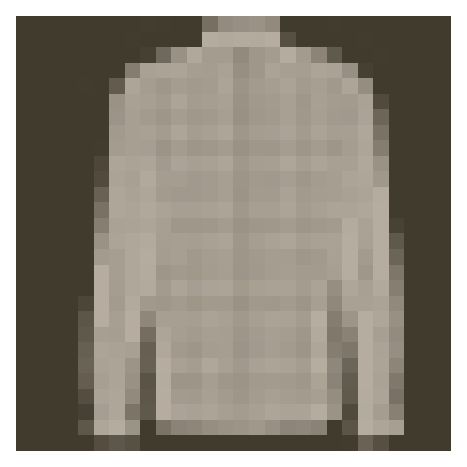

In [51]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

With the data loaded, it's time to import the necessary packages.

In [52]:
# Importing the torch libraries
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [53]:
class Network(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        # Defining the first layer 
        self.fc1 = nn.Linear(in_features = 784, out_features = 200)
        
        # Defining the second layer
        self.fc2 = nn.Linear(in_features = 200, out_features = 50)
        
        # Defining the third layer
        self.fc3 = nn.Linear(in_features = 50, out_features = 10)
        
    def forward(self, x):
        """
        Forward pass through the network.
        """
        # First layer
        x = self.fc1(x)
        x = F.relu(x)
        
        # Second layer
        x = self.fc2(x)
        x = F.relu(x)
        
        # Third layer
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        """
        Predicting amoung the classes using softmax.
        """
        logits = self.forward(x)
        return F.softmax(logits, dim = 1)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [54]:
# Create the network, define the criterion and optimizer
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 0.0001)

In [61]:
# Train the network here

# Initialization
epochs = 3
print_every = 40
steps = 0

# Iterating thorugh epochs
for e in range(epochs):
    
    running_loss = 0
    
    # Iterating though images and labels
    for images, labels in iter(trainloader):
        
        # Incrementing the steps
        steps += 1
        
        # Flattening the images
        images.resize_(images.size()[0], 784)
        
        # Wrapping images and labels in Variables
        inputs = Variable(images)
        targets = Variable(labels)
        
        # Reseting gradients zeros
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        # Adding up the loss
        running_loss += loss.data[0]
        
        # Printing out the progress
        if steps % print_every == 0:
            print("Epoch {}/{}, Loss: {:.4f}".format(e + 1, epochs, running_loss / print_every))
            
            running_loss = 0

/Users/soheil/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:36: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 1/3, Loss: 0.3548
Epoch 1/3, Loss: 0.3669
Epoch 1/3, Loss: 0.3481
Epoch 1/3, Loss: 0.3607
Epoch 1/3, Loss: 0.3456
Epoch 1/3, Loss: 0.3365
Epoch 1/3, Loss: 0.3463
Epoch 1/3, Loss: 0.3694
Epoch 1/3, Loss: 0.3620
Epoch 1/3, Loss: 0.3508
Epoch 1/3, Loss: 0.3346
Epoch 1/3, Loss: 0.3438
Epoch 1/3, Loss: 0.3619
Epoch 1/3, Loss: 0.3697
Epoch 1/3, Loss: 0.3443
Epoch 1/3, Loss: 0.3356
Epoch 1/3, Loss: 0.3746
Epoch 1/3, Loss: 0.3348
Epoch 1/3, Loss: 0.3671
Epoch 1/3, Loss: 0.3676
Epoch 1/3, Loss: 0.3455
Epoch 1/3, Loss: 0.3385
Epoch 1/3, Loss: 0.3531
Epoch 2/3, Loss: 0.1757
Epoch 2/3, Loss: 0.3463
Epoch 2/3, Loss: 0.3220
Epoch 2/3, Loss: 0.3510
Epoch 2/3, Loss: 0.3453
Epoch 2/3, Loss: 0.3518
Epoch 2/3, Loss: 0.3558
Epoch 2/3, Loss: 0.3576
Epoch 2/3, Loss: 0.3252
Epoch 2/3, Loss: 0.3436
Epoch 2/3, Loss: 0.3352
Epoch 2/3, Loss: 0.3296
Epoch 2/3, Loss: 0.3264
Epoch 2/3, Loss: 0.3383
Epoch 2/3, Loss: 0.3197
Epoch 2/3, Loss: 0.3447
Epoch 2/3, Loss: 0.3435
Epoch 2/3, Loss: 0.3493
Epoch 2/3, Loss:

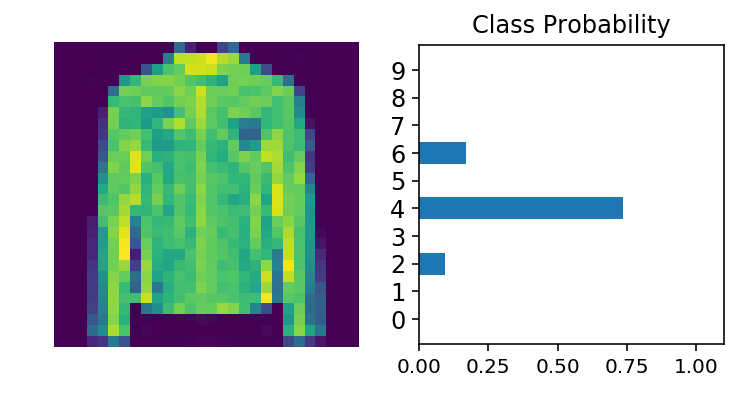

In [63]:
dataiter = iter(testloader)
images, labels = dataiter.next()

img = images[0]
logits = model.forward(Variable(img.resize_(1, 784)))
ps = F.softmax(logits, dim=1)
helper.view_classify(img.resize_(1, 28, 28), ps)

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.